# TP Curso Data Science Santander

Grupo N°5:

*   Cerezo, Yenny
*   Di Gaeta, Nicolás
*   Fernández, Lautaro
*   Jiménez, Jessica
*   Martin, Christian
*   Sueldo, Braian

## Cargamos el entorno de trabajo

Cargamos bibliotecas a usar

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math

Clonamos el repositorio donde están los datos

In [ ]:
%cd /content
!git clone -l -s https://github.com/lautarogfernandez/tp-santander-dm-dh.git repositorio
%cd repositorio/
!ls

/content
fatal: destination path 'repositorio' already exists and is not an empty directory.
/content/repositorio
properatti.7z  properatti.csv  README.md


Descomprimimos los datos

In [ ]:
!7z e "./properatti.7z"


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan ./            1 file, 22745106 bytes (22 MiB)

Extracting archive: ./properatti.7z
--
Path = ./properatti.7z
Type = 7z
Physical Size = 22745106
Headers Size = 138
Method = LZMA2:24
Solid = -
Blocks = 1

  0%    
Would you like to replace the existing file:
  Path:     ./properatti.csv
  Size:     149311692 bytes (143 MiB)
  Modified: 2021-11-30 13:17:18
with the file from archive:
  Path:     properatti.csv
  Size:     149311692 bytes (143 MiB)
  Modified: 2021-11-30 13:17:18
? (Y)es / (N)o / (A)lways / (S)kip all / A(u)to rename all / (Q)uit? y

  0% - properatti.csv                      13% - properatti.csv                      22% -

Cargamos los datos a utilizar

In [ ]:
df_original = pd.read_csv('properatti.csv')
df_original.head()

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,1676227.5,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,USD,1129248.0,64000.0,35.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


## Exploramos el dataset en general

Vemos algunas medidas del dataset

In [ ]:
df_original.describe()

,Unnamed: 0,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,121220.000000,1.025030e+05,69670.000000,69670.000000,1.008100e+05,1.008100e+05,1.008100e+05,81892.000000,101313.000000,68617.000000,8.765800e+04,7899.000000,47390.000000,1.426200e+04
mean,60609.500000,3.574442e+06,-34.626210,-59.266290,4.685259e+05,4.229397e+06,2.397006e+05,233.795328,133.050181,2160.086916,6.912216e+03,17.452336,3.080840,5.009234e+03
std,34993.344153,3.541306e+05,1.980936,2.299922,2.260101e+06,6.904714e+06,3.913239e+05,1782.222147,724.351479,2759.288621,2.837864e+04,120.243621,1.860773,1.204403e+05
min,0.000000,3.427208e+06,-54.823985,-75.678931,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.600000,1.510204e+00,1.000000,1.000000,1.000000e+00
25%,30304.750000,3.430234e+06,-34.669065,-58.727040,1.100000e+05,1.583309e+06,8.973388e+04,50.000000,45.000000,1218.181818,1.550000e+03,1.000000,2.000000,1.000000e+03
50%,60609.500000,3.433910e+06,-34.597985,-58.480128,1.850000e+05,2.558452e+06,1.450000e+05,84.000000,75.000000,1800.000000,2.213115e+03,3.000000,3.000000,2.000000e+03
75%,90914.250000,3.836668e+06,-34.441299,-58.395908,4.200000e+05,4.675792e+06,2.650000e+05,200.000000,150.000000,2486.411765,3.355549e+03,6.000000,4.000000,4.000000e+03
max,121219.000000,6.948895e+06,4.545843,-53.733330,6.500000e+08,8.212711e+08,4.654544e+07,200000.000000,187000.000000,206333.333333,4.000000e+06,3150.000000,32.000000,1.000150e+07


Vemos el tipo de dato y los nulos en las variables

In [ ]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  121220 non-null  int64  
 1   operation                   121220 non-null  object 
 2   property_type               121220 non-null  object 
 3   place_name                  121197 non-null  object 
 4   place_with_parent_names     121220 non-null  object 
 5   country_name                121220 non-null  object 
 6   state_name                  121220 non-null  object 
 7   geonames_id                 102503 non-null  float64
 8   lat-lon                     69670 non-null   object 
 9   lat                         69670 non-null   float64
 10  lon                         69670 non-null   float64
 11  price                       100810 non-null  float64
 12  currency                    100809 non-null  object 
 13  price_aprox_lo

## Comenzamos a ver las variables individualmente

Esto lo haremos sobre las variables relevantes

Variable **operation**



In [ ]:
df_original.operation.value_counts()

sell    121220
Name: operation, dtype: int64

La descartaremos del análisis porque tiene un único valor

Variable **property_type**

In [ ]:
df_original.property_type.value_counts()

apartment    71065
house        40268
PH            5751
store         4136
Name: property_type, dtype: int64

Posee 4 valores distintos en el dataset

In [ ]:
df_original.property_type.isnull().value_counts()

False    121220
Name: property_type, dtype: int64

No tiene nulos

Variable **place_name**

In [ ]:
df_original.place_name.value_counts()

Córdoba                       9254
Rosario                       8504
Mar del Plata                 6534
Tigre                         3324
Nordelta                      3315
                              ... 
Barrio Cerrado "La Emilia"       1
Pehuen-có                        1
San Francisco del Monte          1
Arroyo Ceibal                    1
San Esteban                      1
Name: place_name, Length: 1060, dtype: int64

In [ ]:
df_original.place_name.isnull().value_counts()

False    121197
True         23
Name: place_name, dtype: int64

Variable **place_with_parent_names**

In [ ]:
df_original.place_with_parent_names.value_counts()

|Argentina|Santa Fe|Rosario|                                              8504
|Argentina|Córdoba|Córdoba|                                               6606
|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|                    6534
|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nordelta|                       3315
|Argentina|Capital Federal|Belgrano|                                      2992
                                                                          ... 
|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|Barrio Cerrado "Villa Rosa"|       1
|Argentina|Bs.As. G.B.A. Zona Sur|Cañuelas|Chacras de La Trinidad|           1
|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|La Pilarica|                       1
|Argentina|Entre Ríos|Villa Paranacito|                                      1
|Argentina|Santa Fe|Coronel Bogado|                                          1
Name: place_with_parent_names, Length: 1164, dtype: int64

In [ ]:
df_original.place_with_parent_names.isnull().value_counts()

False    121220
Name: place_with_parent_names, dtype: int64

Variable **country_name**

In [ ]:
df_original.country_name.value_counts()

Argentina    121220
Name: country_name, dtype: int64

Se descarta tambíen del análisis porque toma un único valor

Variable **state_name**

In [ ]:
df_original.state_name.value_counts()

Capital Federal                 32316
Bs.As. G.B.A. Zona Norte        25560
Bs.As. G.B.A. Zona Sur          13952
Córdoba                         12069
Santa Fe                        10172
Buenos Aires Costa Atlántica    10006
Bs.As. G.B.A. Zona Oeste         9322
Buenos Aires Interior            2291
Río Negro                         808
Neuquén                           733
Mendoza                           681
Tucumán                           674
Corrientes                        583
Misiones                          464
Entre Ríos                        369
Salta                             278
Chubut                            259
San Luis                          252
La Pampa                          157
Formosa                            65
Chaco                              57
San Juan                           40
Tierra Del Fuego                   31
Catamarca                          27
Jujuy                              26
Santa Cruz                         20
Santiago Del

In [ ]:
df_original.state_name.value_counts(normalize=True)*100

Capital Federal                 26.658967
Bs.As. G.B.A. Zona Norte        21.085629
Bs.As. G.B.A. Zona Sur          11.509652
Córdoba                          9.956278
Santa Fe                         8.391355
Buenos Aires Costa Atlántica     8.254413
Bs.As. G.B.A. Zona Oeste         7.690150
Buenos Aires Interior            1.889952
Río Negro                        0.666557
Neuquén                          0.604686
Mendoza                          0.561788
Tucumán                          0.556014
Corrientes                       0.480944
Misiones                         0.382775
Entre Ríos                       0.304405
Salta                            0.229335
Chubut                           0.213661
San Luis                         0.207886
La Pampa                         0.129517
Formosa                          0.053622
Chaco                            0.047022
San Juan                         0.032998
Tierra Del Fuego                 0.025573
Catamarca                        0

La gran mayoría de las propiedades son de Capital Federal y Provincia de Buenos Aires

Variable **price**

In [ ]:
df_original.price.isnull().value_counts()

False    100810
True      20410
Name: price, dtype: int64

Variable **price_aprox_usd**

In [ ]:
df_original.price_aprox_usd.isnull().value_counts()

False    100810
True      20410
Name: price_aprox_usd, dtype: int64

Esta variable, **price_aprox_usd**, será la variable target


Variable **price_aprox_local_currency**

In [ ]:
df_original.price_aprox_local_currency.isnull().value_counts()

False    100810
True      20410
Name: price_aprox_local_currency, dtype: int64

Variable **currency**

In [ ]:
df_original.currency.value_counts()

USD    87587
ARS    13219
PEN        2
UYU        1
Name: currency, dtype: int64

Existen varios valores, pero mayoritariamente prevalecen los dólares estadounidenses y pesos argentinos

Variable **surface_total_in_m2**

In [ ]:
df_original.surface_total_in_m2.value_counts()

50.0      1721
40.0      1698
45.0      1404
60.0      1396
70.0      1115
          ... 
2237.0       1
1448.0       1
6648.0       1
1081.0       1
1038.0       1
Name: surface_total_in_m2, Length: 1687, dtype: int64

In [ ]:
df_original.surface_total_in_m2.isnull().value_counts()

False    81892
True     39328
Name: surface_total_in_m2, dtype: int64

In [ ]:
df_original.surface_total_in_m2.isnull().value_counts(normalize=True)

False    0.675565
True     0.324435
Name: surface_total_in_m2, dtype: float64

Existe más de un 30% de nulos

Variable **surface_covered_in_m2**

In [ ]:
df_original.surface_covered_in_m2.value_counts()

40.0      2736
50.0      2184
45.0      2142
60.0      1888
100.0     1848
          ... 
944.0        1
1589.0       1
628.0        1
849.0        1
2300.0       1
Name: surface_covered_in_m2, Length: 995, dtype: int64

In [ ]:
df_original.surface_covered_in_m2.isnull().value_counts()

False    101313
True      19907
Name: surface_covered_in_m2, dtype: int64

Variable **floor**

In [ ]:
df_original.floor.value_counts()

1.0      2080
2.0      1542
3.0       914
4.0       658
5.0       484
         ... 
124.0       1
691.0       1
205.0       1
302.0       1
30.0        1
Name: floor, Length: 182, dtype: int64

Pareciera ser que existen algunos registros con valores erróneos

In [ ]:
df_original.floor.isnull().value_counts()

True     113321
False      7899
Name: floor, dtype: int64

In [ ]:
df_original.floor.isnull().value_counts(normalize=True)

True     0.934837
False    0.065163
Name: floor, dtype: float64

Hay una gran cantidad de nulos, más del 90% de los registros

Vemos algunos valores de los pisos más altos que el 100

In [ ]:
mask = df_original.floor>100
df_original.loc[mask,:].floor.value_counts()

108.0     5
1609.0    4
403.0     4
104.0     4
301.0     3
         ..
306.0     1
234.0     1
205.0     1
133.0     1
107.0     1
Name: floor, Length: 120, dtype: int64

Variable **rooms**

In [ ]:
df_original.rooms.value_counts()

3.0     12567
2.0     12433
4.0      7937
1.0      7377
5.0      3782
6.0      1403
7.0       770
8.0       409
10.0      226
9.0       184
11.0       72
12.0       65
13.0       33
14.0       27
15.0       26
17.0       16
16.0       11
20.0       11
22.0        8
18.0        6
21.0        5
30.0        4
25.0        4
19.0        4
32.0        3
23.0        2
24.0        1
27.0        1
29.0        1
31.0        1
28.0        1
Name: rooms, dtype: int64

In [ ]:
df_original.rooms.isnull().value_counts()

True     73830
False    47390
Name: rooms, dtype: int64

In [ ]:
df_original.rooms.isnull().value_counts(normalize=True)

True     0.609058
False    0.390942
Name: rooms, dtype: float64

Existe un 60% de nulos en la variable

Variable **expenses**

In [ ]:
df_original.expenses.value_counts()

1.0        1028
1000.0      627
1500.0      617
2000.0      561
1200.0      508
           ... 
1935.0        1
22762.0       1
2472.0        1
1883.0        1
11920.0       1
Name: expenses, Length: 982, dtype: int64

In [ ]:
df_original.expenses.isnull().value_counts()

True     106958
False     14262
Name: expenses, dtype: int64

In [ ]:
df_original.expenses.isnull().value_counts(normalize=True)

True     0.882346
False    0.117654
Name: expenses, dtype: float64

Para esta variable, también es extremadamente alta la proporción de nulos, cercana al 90%

Ahora veremos como queda el dataset en cuanto a cantidad de registros si consideramos solo los que tienen **price_aprox_usd** no nulo

In [ ]:
df_con_target = df_original.copy()
mask = df_con_target.price_aprox_usd.isnull()
df_con_target = df_con_target.loc[mask==False,:]
print(f'La cantidad de registros es: {df_con_target.shape[0]}')

La cantidad de registros es: 100810


Sobre este nuevo dataset, vemos la cantidad y la proporción de nulos de la superficie total

In [ ]:
df_con_target.surface_total_in_m2.isnull().value_counts()

False    68866
True     31944
Name: surface_total_in_m2, dtype: int64

In [ ]:
df_con_target.surface_total_in_m2.isnull().value_counts(normalize=True)

False    0.683127
True     0.316873
Name: surface_total_in_m2, dtype: float64

Existe poco más del 30% de los registros con este campo en nulo

Además, vemos la cantidad y la proporción de nulos de la superficie cubierta

In [ ]:
df_con_target.surface_covered_in_m2.isnull().value_counts()

False    87660
True     13150
Name: surface_covered_in_m2, dtype: int64

In [ ]:
df_con_target.surface_covered_in_m2.isnull().value_counts(normalize=True)

False    0.869557
True     0.130443
Name: surface_covered_in_m2, dtype: float64

Existen menos del 15% de los registros con este campo en nulo

## Graficos de proporción

---



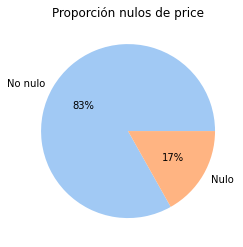

In [ ]:
data = df_original.price.isnull().value_counts(normalize=True) * 100
labels = ['No nulo', 'Nulo']
colors = sns.color_palette('pastel')[0:len(labels)]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Proporción nulos de price")
plt.show()

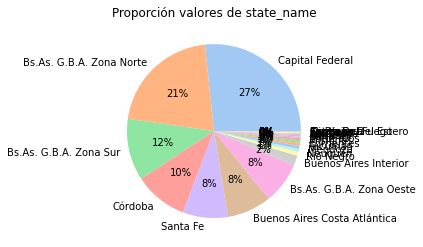

In [ ]:
data = df_original.state_name.value_counts(normalize=True) * 100
labels = ['No nulo', 'Nulo']
labels = data.index.tolist()
colors = sns.color_palette('pastel')[0:len(labels)]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Proporción valores de state_name")
plt.show()

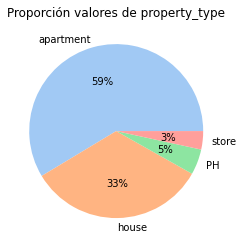

In [ ]:
data = df_original.property_type.value_counts(normalize=True) * 100
labels = ['No nulo', 'Nulo']
labels = data.index.tolist()
colors = sns.color_palette('pastel')[0:len(labels)]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Proporción valores de property_type")
plt.show()

In [ ]:
df_original.shape


(121220, 26)

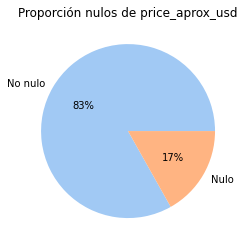

In [ ]:
data = df_original.price_aprox_usd.isnull().value_counts(normalize=True) * 100
labels = ['No nulo', 'Nulo']
colors = sns.color_palette('pastel')[0:len(labels)]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Proporción nulos de price_aprox_usd")
plt.show()

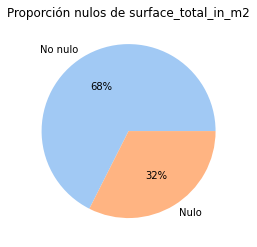

In [ ]:
data = df_original.surface_total_in_m2.isnull().value_counts(normalize=True) * 100
labels = ['No nulo', 'Nulo']
colors = sns.color_palette('pastel')[0:len(labels)]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Proporción nulos de surface_total_in_m2")
plt.show()

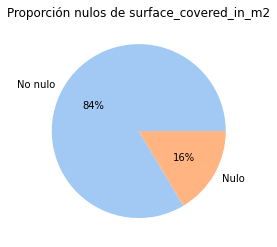

In [ ]:
data = df_original.surface_covered_in_m2.isnull().value_counts(normalize=True) * 100
labels = ['No nulo', 'Nulo']
colors = sns.color_palette('pastel')[0:len(labels)]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Proporción nulos de surface_covered_in_m2")
plt.show()

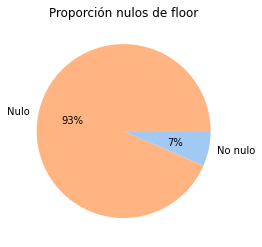

In [ ]:
data = df_original.floor.isnull().value_counts(normalize=True) * 100
labels = ['Nulo', 'No nulo']
colors = sns.color_palette('pastel')[0:len(labels)]
colors = colors[::-1]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Proporción nulos de floor")
plt.show()

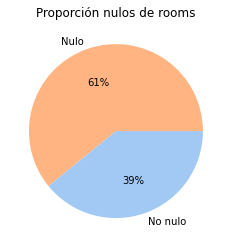

In [ ]:
data = df_original.rooms.isnull().value_counts(normalize=True) * 100
labels = ['Nulo', 'No nulo']
colors = sns.color_palette('pastel')[0:len(labels)]
colors = colors[::-1]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Proporción nulos de rooms")
plt.show()

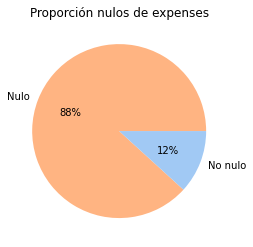

In [ ]:
data = df_original.expenses.isnull().value_counts(normalize=True) * 100
labels = ['Nulo', 'No nulo']
colors = sns.color_palette('pastel')[0:len(labels)]
colors = colors[::-1]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Proporción nulos de expenses")
plt.show()

## Graficamos las relaciones entre algunas variables

Vemos la relción entre el tipo de propiedad y el precio

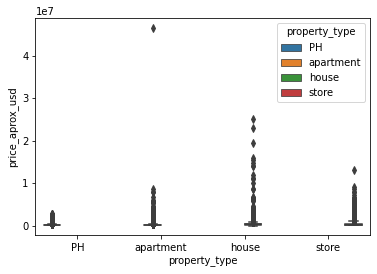

In [ ]:
sns.boxplot(x="property_type", y="price_aprox_usd",
            hue="property_type",
            data=df_original)

Vemos la relación entre las variables, coloreadas por tipo de propiedad

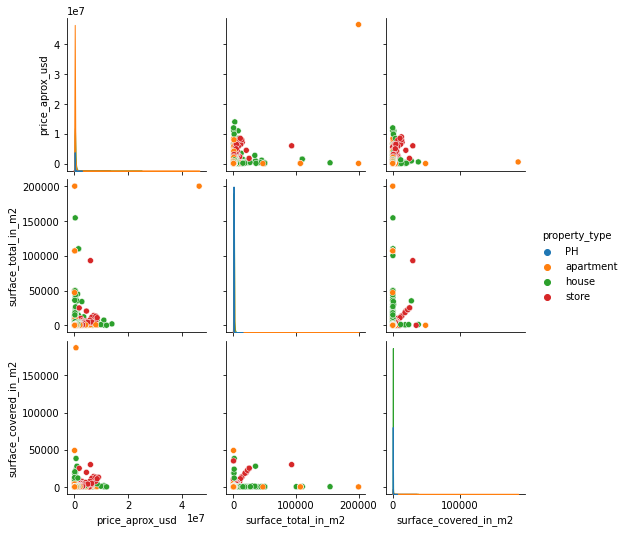

In [ ]:
df_pairplot = df_original.copy()
df_pairplot.drop(columns=['Unnamed: 0', 'operation', 'place_name', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency', 'price_aprox_local_currency', 'price_usd_per_m2', 'price_per_m2',
       'properati_url', 'description', 'title','image_thumbnail','expenses','floor','rooms'], axis=1, inplace=True)
sns.pairplot(df_pairplot, hue="property_type")

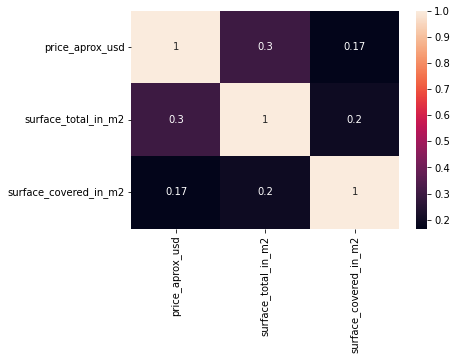

In [ ]:
corrMatrix = df_pairplot.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Hacemos foco en la relación entre superficie total y precio

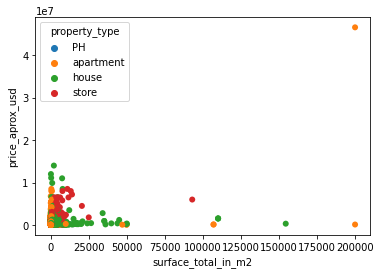

In [ ]:
sns.scatterplot(x="surface_total_in_m2", y="price_aprox_usd",
                hue="property_type",
                sizes=(2, 10), linewidth=0,
                data=df_original)

Hacemos foco en la relación entre superficie cubierta y precio

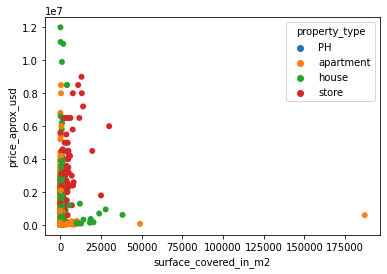

In [ ]:
sns.scatterplot(x="surface_covered_in_m2", y="price_aprox_usd",
                hue="property_type",
                sizes=(1, 10), linewidth=0,
                data=df_original)

Hacemos foco en la relación entre piso y precio

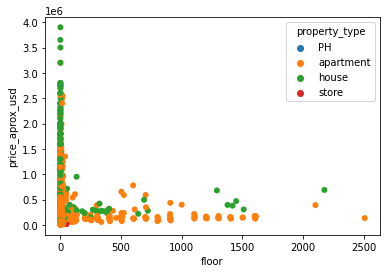

In [ ]:
sns.scatterplot(x="floor", y="price_aprox_usd",
                hue="property_type",
                sizes=(1, 10), linewidth=0,
                data=df_original)

Hacemos foco en la relación entre habitaciones y precio

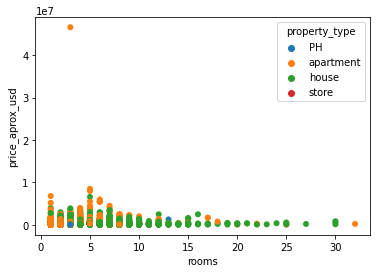

In [ ]:
sns.scatterplot(x="rooms", y="price_aprox_usd",
                hue="property_type",
                sizes=(1, 10), linewidth=0,
                data=df_original)

Hacemos foco en la relación entre expensas y precio

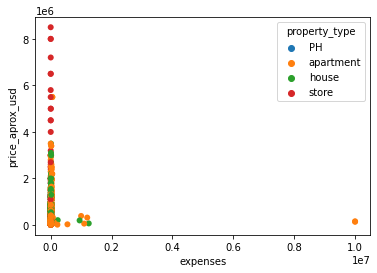

In [ ]:
sns.scatterplot(x="expenses", y="price_aprox_usd",
                hue="property_type",
                sizes=(1, 10), linewidth=0,
                data=df_original)

Observamos la relación entre superficie total y precio nuevamente, sin colorear por tipo de propiedad

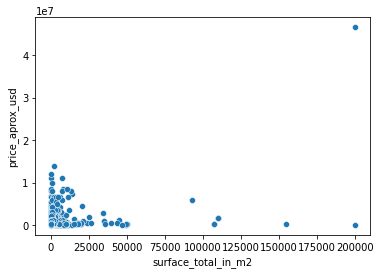

In [ ]:
sns.scatterplot(data = df_original, x = "surface_total_in_m2", y = "price_aprox_usd")

Observamos la relación entre superficie cubierta y precio nuevamente, sin colorear por tipo de propiedad

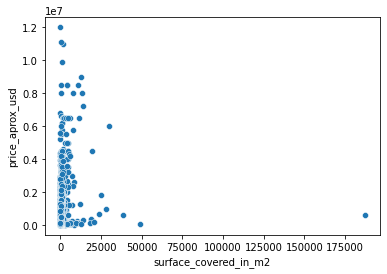

In [ ]:
sns.scatterplot(data = df_original, x = "surface_covered_in_m2", y = "price_aprox_usd")

Observamos la relación entre superficie cubierta y superficie total

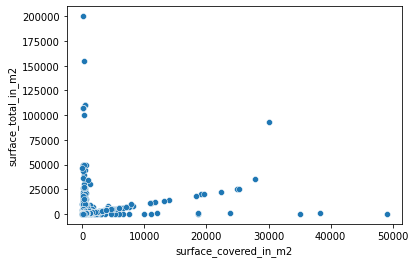

In [ ]:
sns.scatterplot(data = df_original, x = "surface_covered_in_m2", y = "surface_total_in_m2")

## Filtramos las propiedades que NO usaremos

Creamos una copia de trabajo sin las columnas que no tiene sentido analizar

In [ ]:
df_trabajo = df_con_target.copy()
df_trabajo.drop(columns=['Unnamed: 0', 'operation', 'place_name', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency', 'price_aprox_local_currency', 'price_usd_per_m2', 'price_per_m2',
       'properati_url', 'description', 'title','image_thumbnail'], axis=1, inplace=True)
df_trabajo.head(10)

,property_type,place_with_parent_names,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses
0,PH,|Argentina|Capital Federal|Mataderos|,62000.00,55.0,40.0,NaN,NaN,NaN
1,apartment,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,150000.00,NaN,NaN,NaN,NaN,NaN
2,apartment,|Argentina|Capital Federal|Mataderos|,72000.00,55.0,55.0,NaN,NaN,NaN
3,PH,|Argentina|Capital Federal|Liniers|,95000.00,NaN,NaN,NaN,NaN,NaN
4,apartment,|Argentina|Buenos Aires Costa Atlántica|Mar de...,64000.00,35.0,35.0,NaN,NaN,NaN
6,PH,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,130000.00,106.0,78.0,NaN,NaN,NaN
7,apartment,|Argentina|Capital Federal|Belgrano|,138000.00,45.0,40.0,NaN,NaN,NaN
8,apartment,|Argentina|Capital Federal|Belgrano|,195000.00,65.0,60.0,NaN,NaN,NaN
9,house,|Argentina|Santa Fe|Rosario|,25798.49,NaN,NaN,NaN,NaN,NaN
10,house,|Argentina|Córdoba|Córdoba|,70000.00,1514.0,NaN,NaN,NaN,NaN


## Filtramos los outliers


Dejamos superficie cubierta <= 50000 (surface_covered_in_m2 <= 50.000)


In [ ]:
# filtro en el dataset df_trabajo los outlier de surface_covered_in_m2 > 50000
df_trabajo = df_trabajo[df_trabajo['surface_covered_in_m2'] <= 50000]

Dejamos todas las propiedades que tengan precio en dólares <= 10.000.000 y mayor a 0 (price_aprox_usd)

In [ ]:
# elimino las propiedades con price_aprox_usd = 0
df_trabajo = df_trabajo[df_trabajo['price_aprox_usd'] > 0]

In [ ]:
# filtro en el dataset df_trabajo los outlier de price_aprox_usd > 10.000.000
df_trabajo = df_trabajo[df_trabajo['price_aprox_usd'] <= 10000000]

## Imputación



*   Media de superficie cubierta y superficie total por País-Provincia-Localidad
*   Media de superficie cubierta por tipo de propiedad



Obtenemos un dataframe con la superficie total por País-Provincia-Localidad filtrando los valores nulos para superficie

In [ ]:
# df con el place_with_parent_names y surface_total
df_place_total_surface = df_trabajo.loc[:, ['place_with_parent_names', 'surface_total_in_m2']].dropna(subset=['surface_total_in_m2'])
df_place_total_surface.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63349 entries, 0 to 121219
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   place_with_parent_names  63349 non-null  object 
 1   surface_total_in_m2      63349 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.4+ MB


Obtenemos un dataframe con la superficie cubierta por País-Provincia-Localidad filtrando los valores nulos para superficie

In [ ]:
# df con el place_with_parent_names y surface_covered_in_m2
df_place_covered_surface = df_trabajo.loc[:, ['place_with_parent_names', 'surface_covered_in_m2']].dropna(subset=['surface_covered_in_m2'])
df_place_covered_surface.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87656 entries, 0 to 121219
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   place_with_parent_names  87656 non-null  object 
 1   surface_covered_in_m2    87656 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.0+ MB


Obtenemos un dataframe con la superficie cubierta por tipo de propiedad filtrando los valores nulos para superficie

In [ ]:
# df con el property_type y surface_covered_in_m2
df_property_covered_surface = df_trabajo.loc[:, ['property_type', 'surface_covered_in_m2']].dropna(subset=['surface_covered_in_m2'])
df_property_covered_surface.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87656 entries, 0 to 121219
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   property_type          87656 non-null  object 
 1   surface_covered_in_m2  87656 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.0+ MB


Obtenemos un dataframe con la superficie cubierta por tipo de propiedad filtrando los valores nulos para superficie

In [ ]:
# df con el property_type y surface_total_in_m2
df_property_total_surface = df_trabajo.loc[:, ['property_type', 'surface_total_in_m2']].dropna(subset=['surface_total_in_m2'])
df_property_total_surface.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63349 entries, 0 to 121219
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        63349 non-null  object 
 1   surface_total_in_m2  63349 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.4+ MB


Calculamos la media de superficie total por País-Provincia-Localidad en un nuevo dataframe

In [ ]:
# obtengo la media de surface_total por place_with_parent_names
df_place_total_surface_mean = df_place_total_surface.groupby(['place_with_parent_names']).mean()
df_place_total_surface_mean.info()
df_place_total_surface_mean.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 859 entries, |Argentina|Bs.As. G.B.A. Zona Norte| to |Argentina|Tucumán|Yerba Buena|
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   surface_total_in_m2  859 non-null    float64
dtypes: float64(1)
memory usage: 13.4+ KB


,surface_total_in_m2
place_with_parent_names,
|Argentina|Bs.As. G.B.A. Zona Norte|,645.088050
|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|,341.161290
|Argentina|Bs.As. G.B.A. Zona Norte|Escobar| Country Maschwitz Club|,275.500000
|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Acacias Blancas|,238.800000
|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Altos de Matheu|,150.000000
|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Barrio Acacias|,240.333333
|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Barrio Araucarias|,256.250000
|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Barrio Cerrado El Lucero|,205.428571
|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Barrio Marinas|,247.142857


Calculamos la media de superficie cubierta por País-Provincia-Localidad en un nuevo dataframe

In [ ]:
# obtengo la media de surface_covered por place_with_parent_names
df_place_covered_surface_mean = df_place_covered_surface.groupby(['place_with_parent_names']).mean()
df_place_covered_surface_mean.info()
df_place_covered_surface_mean.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 1005 entries, |Argentina|Bs.As. G.B.A. Zona Norte| to |Argentina|Tucumán|Yerba Buena|
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surface_covered_in_m2  1005 non-null   float64
dtypes: float64(1)
memory usage: 15.7+ KB


,surface_covered_in_m2
place_with_parent_names,
|Argentina|Bs.As. G.B.A. Zona Norte|,200.819149
|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|,181.563158
|Argentina|Bs.As. G.B.A. Zona Norte|Escobar| Country Maschwitz Club|,241.666667
|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Acacias Blancas|,210.212121
|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Altos de Matheu|,150.000000
|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Barrio Acacias|,184.666667
|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Barrio Alamo Alto|,135.000000
|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Barrio Araucarias|,199.750000
|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Barrio Ceibos|,215.666667


Calculamos la media de superficie total por tipo de propiedad en un nuevo dataframe

In [ ]:
# obtengo la media de surface_total por property_type
df_property_total_surface_mean = df_property_total_surface.groupby(['property_type']).mean()
df_property_total_surface_mean.info()
df_property_total_surface_mean.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, PH to store
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   surface_total_in_m2  4 non-null      float64
dtypes: float64(1)
memory usage: 64.0+ bytes


,surface_total_in_m2
property_type,
PH,116.847905
apartment,89.524837
house,491.820826
store,473.198980


Calculamos la media de superficie cubierta por tipo de propiedad en un nuevo dataframe

In [ ]:
# obtengo la media de surface_covered por property_type
df_property_covered_surface_mean = df_property_covered_surface.groupby(['property_type']).mean()
df_property_covered_surface_mean.info()
df_property_covered_surface_mean.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, PH to store
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surface_covered_in_m2  4 non-null      float64
dtypes: float64(1)
memory usage: 64.0+ bytes


,surface_covered_in_m2
property_type,
PH,88.151142
apartment,70.623412
house,216.538025
store,360.105510


Cramos un nuevo dataframe con el merge de los dataframe de superficie cubierta y total por tipo de propiedad, y le agregamos una nueva columna con la relación superficie cubierta / superficie total

In [ ]:
# obtendo un df con la relación surface_covered / surface_total por property_type
df_property_relation_covered = pd.merge(left=df_property_covered_surface_mean, right=df_property_total_surface_mean, left_on='property_type', right_on='property_type')

df_property_relation_covered['relation'] = df_property_relation_covered.apply(
    lambda row: row.surface_covered_in_m2 / row.surface_total_in_m2, axis=1)

df_property_relation_covered.info()
df_property_relation_covered.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, PH to store
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surface_covered_in_m2  4 non-null      float64
 1   surface_total_in_m2    4 non-null      float64
 2   relation               4 non-null      float64
dtypes: float64(3)
memory usage: 128.0+ bytes


,surface_covered_in_m2,surface_total_in_m2,relation
property_type,,,
PH,88.151142,116.847905,0.754409
apartment,70.623412,89.524837,0.788869
house,216.538025,491.820826,0.440278
store,360.105510,473.198980,0.761002


Hacemos la imputación de los valores nulos de superficie total y superficie cubierta usando la media por País-Provincia-Localidad que calculamos previamente.
Si no pudimos imputar la superficie cubierta con la media, pero sí tenemos superficie total (original o calculada), imputamos la superficie cubierta usando la relación superficie cubierta / superficie total por tipo de propiedad que habíamos calculado anteriormente.

In [ ]:
df_trabajo2 = df_trabajo.copy()

# reemplazo en df_trabajo los null de surface_covered_in_m2 y surface_toal_in_m2 por la media del place_with_parent_names
for i in range(0,df_trabajo2.shape[0]):
  
  # reemplazo NaN surface_total_in_m2 por la media de place_with_parent_names
  if math.isnan(df_trabajo2.iloc[i, 3]) and df_trabajo2.iloc[i, 1] in df_place_total_surface_mean.index:    
    df_trabajo2.iloc[i, 3] = df_place_total_surface_mean.loc[df_trabajo2.iloc[i, 1]][0]

  # reemplazo NaN surface_covered_in_m2 por la media de place_with_parent_names
  if math.isnan(df_trabajo2.iloc[i, 4]) and df_trabajo2.iloc[i, 1] in df_place_covered_surface_mean.index:
    df_trabajo2.iloc[i, 4] = df_place_covered_surface_mean.loc[df_trabajo2.iloc[i, 1]][0]
  
  # si surface_covered_in_m2 es NaN pero tengo surface_total_in_m2 aplico la proporcion por property_type
  if math.isnan(df_trabajo2.iloc[i, 4]) and not(math.isnan(df_trabajo2.iloc[i, 3])) and df_trabajo2.iloc[i,0] in df_property_relation_covered.index:  
    df_trabajo2.iloc[i, 4] = df_trabajo2.iloc[i, 3] * df_property_relation_covered.loc[df_trabajo2.iloc[i,0]][2]    


Comparamos cuántos valores nulos quedaron respecto del dataframe sin imputación para la superficie cubierta

In [ ]:
# comparo cuanto pude mejorar imputando la media para surface_covered_in_m2
print(df_trabajo['surface_covered_in_m2'].isnull().value_counts())
print(df_trabajo2['surface_covered_in_m2'].isnull().value_counts())

False    87656
Name: surface_covered_in_m2, dtype: int64
False    87656
Name: surface_covered_in_m2, dtype: int64


Comparamos cuántos valores nulos quedaron respecto del dataframe sin imputación para la superficie total

In [ ]:
# comparo cuanto pude mejorar imputando la media para surface_total_in_m2
print(df_trabajo['surface_total_in_m2'].isnull().value_counts())
print(df_trabajo2['surface_total_in_m2'].isnull().value_counts())

False    63349
True     24307
Name: surface_total_in_m2, dtype: int64
False    87140
True       516
Name: surface_total_in_m2, dtype: int64


Copiamos el dataframe con datos imputados sobre el dataframe de trabajo para continuar con la predicción

In [ ]:
# copio el df a df_trabajo
df_trabajo = df_trabajo2.copy()

Graficamos cómo quedan los datos que vamos a usar para predecir el precio en base a la superficie cubierta

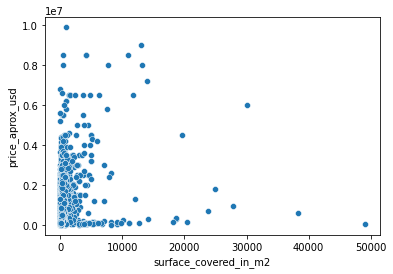

In [ ]:
sns.scatterplot(data = df_trabajo, x = "surface_covered_in_m2", y = "price_aprox_usd")

## Generamos el dataframe para el modelo Lineal Simple

Nos quedamos solo con los registros que tienen valor de *surface_total_in_m2*

In [ ]:
df_modelo = df_trabajo2.copy()
df_modelo = df_modelo.loc[:,['surface_covered_in_m2','price_aprox_usd']]
df_modelo.dropna(axis=0, how='any', inplace=True)
df_modelo

,surface_covered_in_m2,price_aprox_usd
0,40.0,62000.0
2,55.0,72000.0
4,35.0,64000.0
6,78.0,130000.0
7,40.0,138000.0
...,...,...
121215,93.0,870000.0
121216,360.0,498000.0
121217,39.0,131500.0
121218,48.0,95900.0


## Ajuste de Modelo Lineal Simple

Separamos los datos en train y test

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df_modelo[['surface_covered_in_m2']], df_modelo.price_aprox_usd, test_size=0.25, random_state=42)

Ajustamos un modelo Lineal Simple con la variable *surface_covered_in_m2*

In [ ]:
model = LinearRegression().fit(Xtrain, ytrain)

Observamos los parámetros del modelo ajustado

In [ ]:
print ('Intercepto =', ' ', model.intercept_)
print ('RM =', ' ', model.coef_[0])

Intercepto =   211030.35504755622
RM =   284.53123106313615


Vemos el R2 del modelo

In [ ]:
print ('R2_train=', ' ', model.score(Xtrain, ytrain))

R2_train=   0.10569194506696744


Guardamos  las predicciones para train y test

In [ ]:
predictionsTrain = model.predict(Xtrain)
predictionsTest = model.predict(Xtest)

Calculamos el Mean Squared Error (MSE)

In [ ]:
print("MSE Train:", mean_squared_error(y_true=ytrain, y_pred=predictionsTrain))
print("MSE Test:", mean_squared_error(y_true=ytest, y_pred=predictionsTest))

MSE Train: 93955098071.77199
MSE Test: 98932912755.63805


Calculamos el Mean Absolute Error (MAE)

In [ ]:
print("MAE Train:", mean_absolute_error(y_true=ytrain, y_pred=predictionsTrain))
print("MAE Test:", mean_absolute_error(y_true=ytest, y_pred=predictionsTest))

MAE Train: 157504.84997986836
MAE Test: 155012.9836087459


Graficamos la recta obtenida

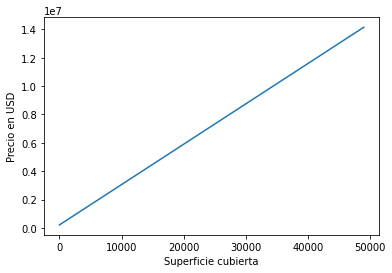

In [ ]:
i=model.intercept_  # intercept
s=model.coef_[0]    # slope
x=np.linspace(0,49000,5000)
plt.plot(x, s*x + i)
plt.xlabel("Superficie cubierta")
plt.ylabel("Precio en USD")
plt.show()

Otra manera de ajustar el modelo

In [ ]:
x_model = sm.add_constant(Xtrain)
model_2 = sm.OLS(ytrain, x_model).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:        price_aprox_usd   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     7769.
Date:                Thu, 20 Jan 2022   Prob (F-statistic):               0.00
Time:                        21:33:02   Log-Likelihood:            -9.2381e+05
No. Observations:               65742   AIC:                         1.848e+06
Df Residuals:                   65740   BIC:                         1.848e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   2.11e+

## Generamos el dataframe para el modelo Lineal Múltiple

Para este nuevo modelo consideraremos como variables regresoras a la superficie total, superficie cubierta y tipo de propiedad.

Al tipo de propiedad lo pasamos a variables dummies.

Solo consideramos registros que no tengan datos nulos.

In [ ]:
df_multiple = df_trabajo2.copy()
df_multiple = df_multiple[['property_type','price_aprox_usd','surface_total_in_m2','surface_covered_in_m2']]
df_multiple.dropna(axis=0, how='any', inplace=True)
property_type_categories = pd.get_dummies(df_multiple.property_type, drop_first = True, prefix = 'property_type_cat')
df_multiple = df_multiple.join(property_type_categories)
df_multiple.drop(columns=['property_type'], inplace=True)
df_multiple

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,property_type_cat_apartment,property_type_cat_house,property_type_cat_store
0,62000.0,55.0,40.0,0,0,0
2,72000.0,55.0,55.0,1,0,0
4,64000.0,35.0,35.0,1,0,0
6,130000.0,106.0,78.0,0,0,0
7,138000.0,45.0,40.0,1,0,0
...,...,...,...,...,...,...
121215,870000.0,113.0,93.0,1,0,0
121216,498000.0,360.0,360.0,0,1,0
121217,131500.0,46.0,39.0,1,0,0
121218,95900.0,48.0,48.0,1,0,0


## Ajuste de Modelo Lineal Múltiple

Separamos los datos en train y test

In [ ]:
data_m = df_multiple[['surface_total_in_m2', 'surface_covered_in_m2', 'property_type_cat_apartment', 'property_type_cat_house', 'property_type_cat_store']]
Xtrain_m, Xtest_m, ytrain_m, ytest_m = train_test_split(data_m, df_multiple.price_aprox_usd, test_size=0.25, random_state=42)

Ajustamos un modelo Lineal Múltiple con las variables *surface_total_in_m2*, *property_type* y *surface_covered_in_m2*

In [ ]:
model_m = LinearRegression().fit(Xtrain_m, ytrain_m)

Observamos los parámetros del modelo ajustado

In [ ]:
print ('Intercepto =', ' ', model_m.intercept_)
print ('RM =', ' ', model_m.coef_)

Intercepto =   129503.42245312389
RM =   [1.24022593e+01 2.25941055e+02 4.56745769e+04 1.56107460e+05
 2.57304477e+05]


Vemos el R2 del modelo

In [ ]:
print ('R2_train=', ' ', model_m.score(Xtrain_m, ytrain_m))

R2_train=   0.13594266163995317


Guardamos las predicciones para train y test

In [ ]:
predictionsTrain_m = model_m.predict(Xtrain_m)
predictionsTest_m = model_m.predict(Xtest_m)

Calculamos el Mean Squared Error (MSE)

In [ ]:
print("MSE Train:", mean_squared_error(y_true=ytrain_m, y_pred=predictionsTrain_m))
print("MSE Test:", mean_squared_error(y_true=ytest_m, y_pred=predictionsTest_m))

MSE Train: 90772309290.57446
MSE Test: 92236993169.28192


Calculamos el Mean Absolute Error (MAE)

In [ ]:
print("MAE Train:", mean_absolute_error(y_true=ytrain_m, y_pred=predictionsTrain_m))
print("MAE Test:", mean_absolute_error(y_true=ytest_m, y_pred=predictionsTest_m))

MAE Train: 149654.9772752175
MAE Test: 149158.00603498783
